In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
# Membaca dataset
data = pd.read_csv('supermarketsales.csv')

In [3]:
# Menampilkan data
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
# Mengambil sampel data sebanyak 60
sampled_data = data[:60]

In [5]:
# Menghapus kolom yang tidak diperlukan
data_cleaned = sampled_data.drop(columns=['Invoice ID', 'Date', 'Time', 'gross margin percentage'])

In [6]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Branch         60 non-null     object 
 1   City           60 non-null     object 
 2   Customer type  60 non-null     object 
 3   Gender         60 non-null     object 
 4   Product line   60 non-null     object 
 5   Unit price     60 non-null     float64
 6   Quantity       60 non-null     int64  
 7   Tax 5%         60 non-null     float64
 8   Total          60 non-null     float64
 9   Payment        60 non-null     object 
 10  cogs           60 non-null     float64
 11  gross income   60 non-null     float64
 12  Rating         60 non-null     float64
dtypes: float64(6), int64(1), object(6)
memory usage: 6.2+ KB


In [7]:
# Memilih fitur yang relevan
features = ['Unit price', 'Quantity', 'Tax 5%', 'Total', 'cogs', 'gross income', 'Rating']

In [8]:
# Normalisasi data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_cleaned[features])

In [9]:
# Menentukan jumlah cluster optimal menggunakan Silhouette Score
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, kmeans.labels_))

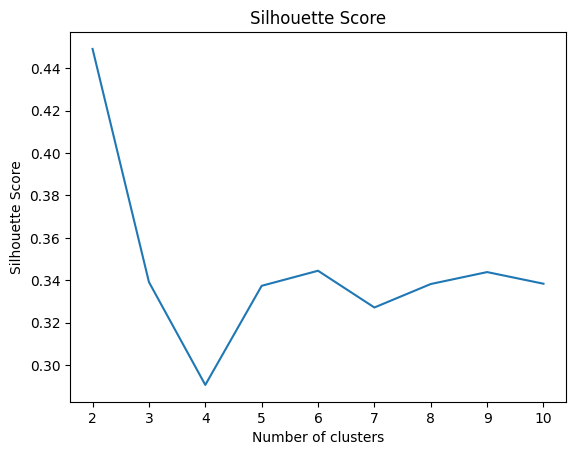

In [10]:
# Plot hasil Silhouette
plt.plot(range(2, 11), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [11]:
# Dari plot elbow, kita bisa melihat jumlah cluster optimal
optimal_clusters = 3

In [12]:
# Menerapkan K-Means Clustering
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(data_scaled)

In [13]:
# Menambahkan hasil clustering ke dataset asli
data_cleaned['Cluster'] = clusters

In [14]:
# Menampilkan hasil clustering
data_cleaned.head()

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Payment,cogs,gross income,Rating,Cluster
0,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,Ewallet,522.83,26.1415,9.1,2
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,Cash,76.40,3.8200,9.6,1
2,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,Credit card,324.31,16.2155,7.4,2
3,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,Ewallet,465.76,23.2880,8.4,2
4,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,Ewallet,604.17,30.2085,5.3,0


In [15]:
# Melihat distribusi cluster berdasarkan kota
cluster_city_distribution = data_cleaned.groupby(['Cluster', 'City']).size().unstack(fill_value=0)

In [16]:
# Menampilkan hasil distribusi
cluster_city_distribution

City,Mandalay,Naypyitaw,Yangon
Cluster,,,
0,3,6,5
1,12,6,9
2,6,3,10


In [17]:
# Analisis hasil clustering
for i in range(optimal_clusters):
    print(f"Cluster {i}:\n", data_cleaned[data_cleaned['Cluster'] == i].describe(), "\n")

Cluster 0:
        Unit price   Quantity     Tax 5%       Total        cogs  gross income  \
count   14.000000  14.000000  14.000000   14.000000   14.000000     14.000000   
mean    82.410714   8.357143  33.993750  713.868750  679.875000     33.993750   
std     10.183397   1.336306   4.090163   85.893422   81.803259      4.090163   
min     60.880000   6.000000  27.396000  575.316000  547.920000     27.396000   
25%     74.687500   7.250000  30.653875  643.731375  613.077500     30.653875   
50%     84.585000   8.000000  34.761750  729.996750  695.235000     34.761750   
75%     88.777500   9.750000  36.091250  757.916250  721.825000     36.091250   
max     98.700000  10.000000  41.315000  867.615000  826.300000     41.315000   

          Rating  Cluster  
count  14.000000     14.0  
mean    6.221429      0.0  
std     1.720545      0.0  
min     4.100000      0.0  
25%     4.800000      0.0  
50%     5.550000      0.0  
75%     7.825000      0.0  
max     9.500000      0.0   

Clus

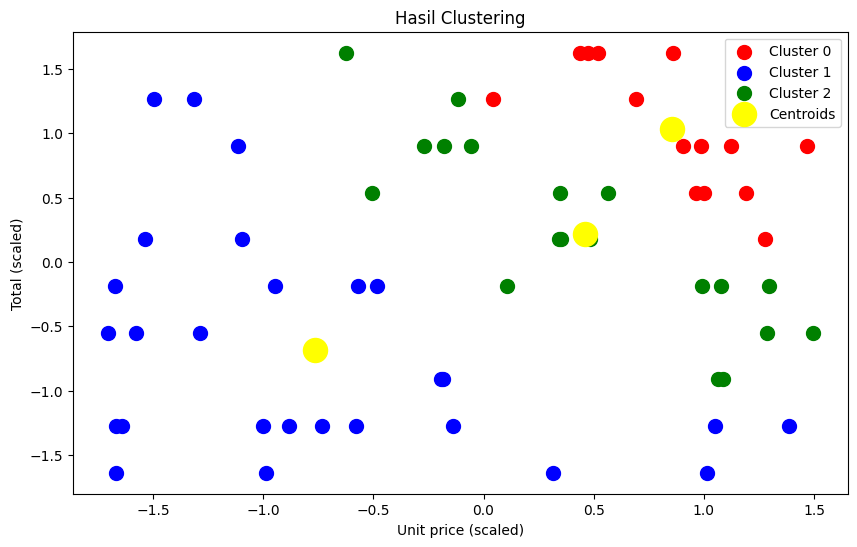

In [18]:
# Visualisasi hasil clustering dengan fitur 'Unit price' dan 'Total'
plt.figure(figsize=(10, 6))
plt.scatter(data_scaled[clusters == 0, 0], data_scaled[clusters == 0, 1], s = 100, c = 'red', label = 'Cluster 0')
plt.scatter(data_scaled[clusters == 1, 0], data_scaled[clusters == 1, 1], s = 100, c = 'blue', label = 'Cluster 1')
plt.scatter(data_scaled[clusters == 2, 0], data_scaled[clusters == 2, 1], s = 100, c = 'green', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Hasil Clustering')
plt.xlabel('Unit price (scaled)')
plt.ylabel('Total (scaled)')
plt.legend()
plt.show()